In [1]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

#Reading in data
df = pd.read_csv('Resources/ev_stations_v1.csv', low_memory=False)
df.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,ELEC,LADWP - Truesdale Center,11797 Truesdale St,NaN,Sun Valley,CA,91352,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ELEC,LADWP - West LA District Office,1394 S Sepulveda Blvd,NaN,Los Angeles,CA,90024,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,NaN,213-741-1151,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ELEC,LADWP - John Ferraro Building,111 N Hope St,Across Hope,Los Angeles,CA,90012,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ELEC,LADWP - Haynes Power Plant,6801 E 2nd St,NaN,Long Beach,CA,90803,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#Inspecting column names
df.columns

Index(['Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'ID', 'Updated At', 'Owner Type Code',
       'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'EV Connector Types', 'Country',
       'Intersection Directions (French)', 'Access Days Time (French)',
       'BD Blends (French)', 'Groups With Access Code (French)',
       'Hydrogen Is Retail', 'Access Code', 'Access Detail Code',
       'Federal Agency Code', 'Facility Type', 'CNG Dispenser N

In [3]:
#Creating new dataframe with relevant columns
stations = df[['Station Name', 
                'Street Address', 
                'City', 
                'State', 
                'ZIP', 
                'Access Code', 
                'EV Network', 
                'EV Connector Types', 
                'Latitude', 
                'Longitude',
                'Open Date']]

#stations.head()
stations.shape

(50289, 11)

In [4]:
#Removing null values
stations = stations.dropna()

#stations.head()
stations.shape

(50168, 11)

In [5]:
#Separating 'Open Date' values into its individual parts: year, month, and day
stations[['Open Year','Open Month','Open Day']] = stations['Open Date'].str.split('-', expand=True)
stations

,Station Name,Street Address,City,State,ZIP,Access Code,EV Network,EV Connector Types,Latitude,Longitude,Open Date,Open Year,Open Month,Open Day
0,LADWP - Truesdale Center,11797 Truesdale St,Sun Valley,CA,91352,private,Non-Networked,CHADEMO J1772 J1772COMBO,34.248319,-118.387971,1999-10-15,1999,10,15
1,LADWP - West LA District Office,1394 S Sepulveda Blvd,Los Angeles,CA,90024,private,Non-Networked,J1772,34.052542,-118.448504,2020-02-28,2020,02,28
2,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,public,Non-Networked,J1772,34.040539,-118.271387,1995-08-30,1995,08,30
3,LADWP - John Ferraro Building,111 N Hope St,Los Angeles,CA,90012,private,Non-Networked,CHADEMO J1772 J1772COMBO,34.059133,-118.248589,1999-10-15,1999,10,15
4,LADWP - Haynes Power Plant,6801 E 2nd St,Long Beach,CA,90803,private,Non-Networked,CHADEMO J1772 J1772COMBO,33.759802,-118.096665,2018-05-01,2018,05,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50284,VIP LOT STATION1,1501 Kirkwood Meadows Dr,Markleeville,CA,96120,public,ChargePoint Network,J1772,38.684660,-120.065169,2022-01-14,2022,01,14
50285,Prunedale Shopping Center,8065 San Miguel Canyon Rd,Salinas,CA,93907,public,eVgo Network,CHADEMO J1772COMBO,36.801716,-121.664153,2022-01-14,2022,01,14
50286,Beaverton Electric Avenue,11665 SW Beaverton Hillsdale Hwy,Beaverton,OR,97005,public,Greenlots,CHADEMO J1772COMBO,45.489030,-122.798151,2022-01-14,2022,01,14
50287,Shell - Inman,2040 Highway 292,Inman,SC,29349,public,Greenlots,CHADEMO J1772COMBO,35.082476,-82.058433,2022-01-14,2022,01,14


In [6]:
#Filtering data for only stations in the US
#Removes 'ON' (Ontario), includes 'DC' and 'PR' (Washington DC and Puerto Rico)
stations = stations[stations['State'] != 'ON']


#stations['State'].unique()
#---------------------------------------------------------------------------
#output:
#array(['CA', 'VT', 'WA', 'OR', 'IL', 'ID', 'TX', 'TN', 'NY', 'FL', 'WI',
#       'IA', 'MN', 'AR', 'AZ', 'CT', 'MD', 'NJ', 'SC', 'MI', 'OH', 'WV',
#       'MO', 'UT', 'KS', 'MA', 'CO', 'IN', 'LA', 'NC', 'NH', 'VA', 'AL',
#       'GA', 'HI', 'NV', 'DC', 'PA', 'RI', 'OK', 'ME', 'KY', 'NE', 'MS',
#       'SD', 'DE', 'NM', 'MT', 'ND', 'WY', 'AK', 'PR', 'ON'], dtype=object)

print(len(stations['State'].unique()))
stations

52


,Station Name,Street Address,City,State,ZIP,Access Code,EV Network,EV Connector Types,Latitude,Longitude,Open Date,Open Year,Open Month,Open Day
0,LADWP - Truesdale Center,11797 Truesdale St,Sun Valley,CA,91352,private,Non-Networked,CHADEMO J1772 J1772COMBO,34.248319,-118.387971,1999-10-15,1999,10,15
1,LADWP - West LA District Office,1394 S Sepulveda Blvd,Los Angeles,CA,90024,private,Non-Networked,J1772,34.052542,-118.448504,2020-02-28,2020,02,28
2,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,public,Non-Networked,J1772,34.040539,-118.271387,1995-08-30,1995,08,30
3,LADWP - John Ferraro Building,111 N Hope St,Los Angeles,CA,90012,private,Non-Networked,CHADEMO J1772 J1772COMBO,34.059133,-118.248589,1999-10-15,1999,10,15
4,LADWP - Haynes Power Plant,6801 E 2nd St,Long Beach,CA,90803,private,Non-Networked,CHADEMO J1772 J1772COMBO,33.759802,-118.096665,2018-05-01,2018,05,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50284,VIP LOT STATION1,1501 Kirkwood Meadows Dr,Markleeville,CA,96120,public,ChargePoint Network,J1772,38.684660,-120.065169,2022-01-14,2022,01,14
50285,Prunedale Shopping Center,8065 San Miguel Canyon Rd,Salinas,CA,93907,public,eVgo Network,CHADEMO J1772COMBO,36.801716,-121.664153,2022-01-14,2022,01,14
50286,Beaverton Electric Avenue,11665 SW Beaverton Hillsdale Hwy,Beaverton,OR,97005,public,Greenlots,CHADEMO J1772COMBO,45.489030,-122.798151,2022-01-14,2022,01,14
50287,Shell - Inman,2040 Highway 292,Inman,SC,29349,public,Greenlots,CHADEMO J1772COMBO,35.082476,-82.058433,2022-01-14,2022,01,14


In [7]:
#Separating connector types into individual columns
#a value of '1' means the connector is at that station location, a value of '0' means it is not there
conn_num = pd.Series(stations['EV Connector Types']).str.get_dummies(' ')

#stations['EV Connector Types'].unique()
#---------------------------------------------------------------------------
#output:
#array(['CHADEMO J1772 J1772COMBO', 'J1772', 'CHADEMO J1772', 'NEMA520',
#       'J1772 NEMA520', 'J1772 NEMA515', 'J1772 TESLA', 'NEMA515',
#       'CHADEMO J1772 NEMA515', 'J1772 J1772COMBO', 'J1772 NEMA1450',
#       'TESLA', 'CHADEMO', 'J1772COMBO', 'CHADEMO J1772 NEMA520 TESLA',
#       'CHADEMO J1772 J1772COMBO TESLA', 'J1772COMBO NEMA520', 'NEMA1450',
#       'CHADEMO J1772COMBO NEMA520', 'CHADEMO J1772COMBO',
#       'CHADEMO NEMA520', 'J1772 NEMA515 NEMA520', 'NEMA1450 NEMA520',
#       'J1772 NEMA1450 NEMA520', 'NEMA1450 TESLA', 'NEMA1450 NEMA515',
#       'CHADEMO J1772 J1772COMBO NEMA520', 'CHADEMO J1772COMBO TESLA',
#       'J1772COMBO NEMA515', 'J1772COMBO TESLA'], dtype=object)

stations = stations.merge(conn_num, left_index=True, right_index=True)
stations

,Station Name,Street Address,City,State,ZIP,Access Code,EV Network,EV Connector Types,Latitude,Longitude,...,Open Year,Open Month,Open Day,CHADEMO,J1772,J1772COMBO,NEMA1450,NEMA515,NEMA520,TESLA
0,LADWP - Truesdale Center,11797 Truesdale St,Sun Valley,CA,91352,private,Non-Networked,CHADEMO J1772 J1772COMBO,34.248319,-118.387971,...,1999,10,15,1,1,1,0,0,0,0
1,LADWP - West LA District Office,1394 S Sepulveda Blvd,Los Angeles,CA,90024,private,Non-Networked,J1772,34.052542,-118.448504,...,2020,02,28,0,1,0,0,0,0,0
2,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,public,Non-Networked,J1772,34.040539,-118.271387,...,1995,08,30,0,1,0,0,0,0,0
3,LADWP - John Ferraro Building,111 N Hope St,Los Angeles,CA,90012,private,Non-Networked,CHADEMO J1772 J1772COMBO,34.059133,-118.248589,...,1999,10,15,1,1,1,0,0,0,0
4,LADWP - Haynes Power Plant,6801 E 2nd St,Long Beach,CA,90803,private,Non-Networked,CHADEMO J1772 J1772COMBO,33.759802,-118.096665,...,2018,05,01,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50284,VIP LOT STATION1,1501 Kirkwood Meadows Dr,Markleeville,CA,96120,public,ChargePoint Network,J1772,38.684660,-120.065169,...,2022,01,14,0,1,0,0,0,0,0
50285,Prunedale Shopping Center,8065 San Miguel Canyon Rd,Salinas,CA,93907,public,eVgo Network,CHADEMO J1772COMBO,36.801716,-121.664153,...,2022,01,14,1,0,1,0,0,0,0
50286,Beaverton Electric Avenue,11665 SW Beaverton Hillsdale Hwy,Beaverton,OR,97005,public,Greenlots,CHADEMO J1772COMBO,45.489030,-122.798151,...,2022,01,14,1,0,1,0,0,0,0
50287,Shell - Inman,2040 Highway 292,Inman,SC,29349,public,Greenlots,CHADEMO J1772COMBO,35.082476,-82.058433,...,2022,01,14,1,0,1,0,0,0,0


In [8]:
#Renaming columns
rename = {'Station Name':'station_name', 
            'Street Address':'address', 
            'City':'city', 
            'State':'state', 
            'ZIP':'zip',
            'Access Code':'access', 
            'EV Network':'ev_network', 
            'EV Connector Types':'conn_type',
            'Latitude':'lat',
            'Longitude':'lng',
            'Open Date':'open_date',
            'Open Year':'open_year',
            'Open Month':'open_month',
            'Open Day':'open_day'}

stations = stations.rename(mapper=rename, axis=1)

#stations.head()
stations.columns

Index(['station_name', 'address', 'city', 'state', 'zip', 'access',
       'ev_network', 'conn_type', 'lat', 'lng', 'open_date', 'open_year',
       'open_month', 'open_day', 'CHADEMO', 'J1772', 'J1772COMBO', 'NEMA1450',
       'NEMA515', 'NEMA520', 'TESLA'],
      dtype='object')

In [9]:
# Resetting index
stations = stations.reset_index()
stations

,index,station_name,address,city,state,zip,access,ev_network,conn_type,lat,...,open_year,open_month,open_day,CHADEMO,J1772,J1772COMBO,NEMA1450,NEMA515,NEMA520,TESLA
0,0,LADWP - Truesdale Center,11797 Truesdale St,Sun Valley,CA,91352,private,Non-Networked,CHADEMO J1772 J1772COMBO,34.248319,...,1999,10,15,1,1,1,0,0,0,0
1,1,LADWP - West LA District Office,1394 S Sepulveda Blvd,Los Angeles,CA,90024,private,Non-Networked,J1772,34.052542,...,2020,02,28,0,1,0,0,0,0,0
2,2,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,public,Non-Networked,J1772,34.040539,...,1995,08,30,0,1,0,0,0,0,0
3,3,LADWP - John Ferraro Building,111 N Hope St,Los Angeles,CA,90012,private,Non-Networked,CHADEMO J1772 J1772COMBO,34.059133,...,1999,10,15,1,1,1,0,0,0,0
4,4,LADWP - Haynes Power Plant,6801 E 2nd St,Long Beach,CA,90803,private,Non-Networked,CHADEMO J1772 J1772COMBO,33.759802,...,2018,05,01,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50161,50284,VIP LOT STATION1,1501 Kirkwood Meadows Dr,Markleeville,CA,96120,public,ChargePoint Network,J1772,38.684660,...,2022,01,14,0,1,0,0,0,0,0
50162,50285,Prunedale Shopping Center,8065 San Miguel Canyon Rd,Salinas,CA,93907,public,eVgo Network,CHADEMO J1772COMBO,36.801716,...,2022,01,14,1,0,1,0,0,0,0
50163,50286,Beaverton Electric Avenue,11665 SW Beaverton Hillsdale Hwy,Beaverton,OR,97005,public,Greenlots,CHADEMO J1772COMBO,45.489030,...,2022,01,14,1,0,1,0,0,0,0
50164,50287,Shell - Inman,2040 Highway 292,Inman,SC,29349,public,Greenlots,CHADEMO J1772COMBO,35.082476,...,2022,01,14,1,0,1,0,0,0,0


In [10]:
# Deleting extra index column
del stations['index']
stations

,station_name,address,city,state,zip,access,ev_network,conn_type,lat,lng,...,open_year,open_month,open_day,CHADEMO,J1772,J1772COMBO,NEMA1450,NEMA515,NEMA520,TESLA
0,LADWP - Truesdale Center,11797 Truesdale St,Sun Valley,CA,91352,private,Non-Networked,CHADEMO J1772 J1772COMBO,34.248319,-118.387971,...,1999,10,15,1,1,1,0,0,0,0
1,LADWP - West LA District Office,1394 S Sepulveda Blvd,Los Angeles,CA,90024,private,Non-Networked,J1772,34.052542,-118.448504,...,2020,02,28,0,1,0,0,0,0,0
2,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,public,Non-Networked,J1772,34.040539,-118.271387,...,1995,08,30,0,1,0,0,0,0,0
3,LADWP - John Ferraro Building,111 N Hope St,Los Angeles,CA,90012,private,Non-Networked,CHADEMO J1772 J1772COMBO,34.059133,-118.248589,...,1999,10,15,1,1,1,0,0,0,0
4,LADWP - Haynes Power Plant,6801 E 2nd St,Long Beach,CA,90803,private,Non-Networked,CHADEMO J1772 J1772COMBO,33.759802,-118.096665,...,2018,05,01,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50161,VIP LOT STATION1,1501 Kirkwood Meadows Dr,Markleeville,CA,96120,public,ChargePoint Network,J1772,38.684660,-120.065169,...,2022,01,14,0,1,0,0,0,0,0
50162,Prunedale Shopping Center,8065 San Miguel Canyon Rd,Salinas,CA,93907,public,eVgo Network,CHADEMO J1772COMBO,36.801716,-121.664153,...,2022,01,14,1,0,1,0,0,0,0
50163,Beaverton Electric Avenue,11665 SW Beaverton Hillsdale Hwy,Beaverton,OR,97005,public,Greenlots,CHADEMO J1772COMBO,45.489030,-122.798151,...,2022,01,14,1,0,1,0,0,0,0
50164,Shell - Inman,2040 Highway 292,Inman,SC,29349,public,Greenlots,CHADEMO J1772COMBO,35.082476,-82.058433,...,2022,01,14,1,0,1,0,0,0,0


In [11]:
#Creating engine to sqlite
engine = create_engine('sqlite:///Resources/evstations.sqlite', echo=False)

#Exporting results to sqlite
stations.to_sql(name='evstations', con=engine, if_exists='replace', index=True)

In [12]:
#Exporting results to csv
stations.to_csv('Resources/evstations_clean.csv')

In [ ]:
#Data visualization

In [ ]:
import matplotlib

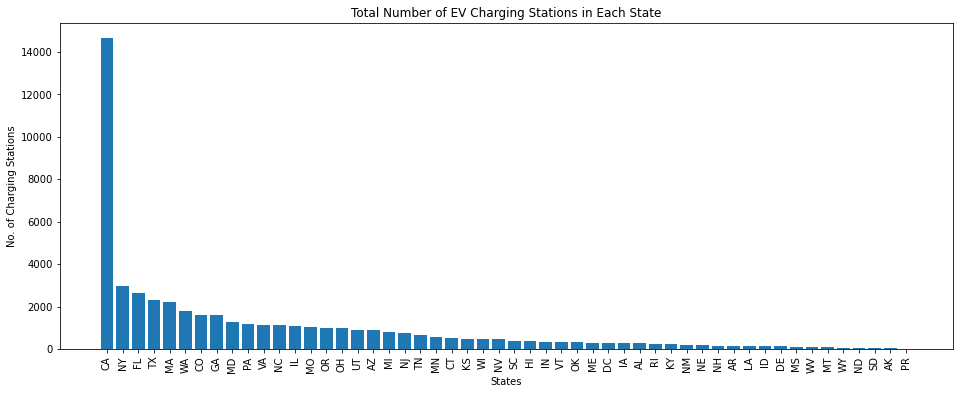

In [13]:
#Finding the total number of charging stations in each state
state_count = stations.state.value_counts()
indx_state = state_count.index

plt.figure(figsize=(16, 6))
plt.bar(indx_state, state_count)
plt.xlabel('States')
plt.ylabel('No. of Charging Stations')
plt.xticks(rotation='vertical')
plt.title('Total Number of EV Charging Stations in Each State')
plt.savefig('Resources/Images/evstation_plt01')
plt.show()

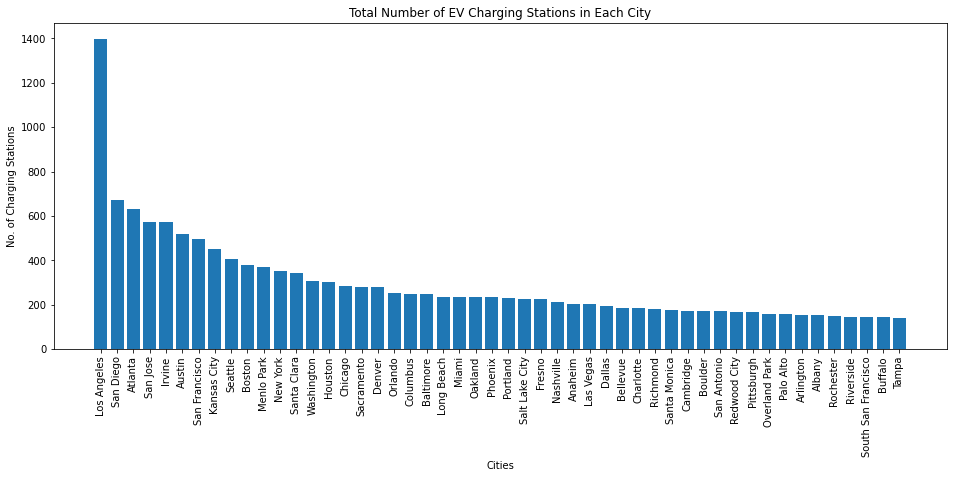

In [14]:
#Finding the total amount of charging stations in the top 50 cities
city_count = stations.city.value_counts().head(50)
indx_city = city_count.index

plt.figure(figsize=(16, 6))
plt.bar(indx_city, city_count)
plt.xlabel('Cities')
plt.ylabel('No. of Charging Stations')
plt.xticks(rotation='vertical')
plt.title('Total Number of EV Charging Stations in Each City')
plt.savefig('Resources/Images/evstation_plt02')
plt.show()

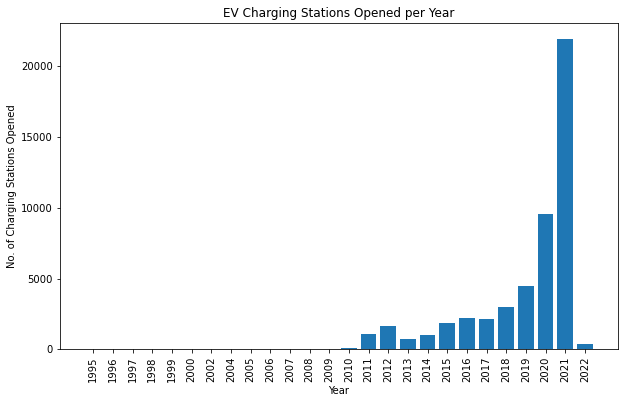

In [15]:
#Seeing progression of charging station openings per year
yr_count = stations.open_year.value_counts(sort=False).sort_index()
indx_yr = yr_count.index

plt.figure(figsize = (10, 6))
plt.bar(indx_yr, yr_count)
plt.xlabel('Year')
plt.ylabel('No. of Charging Stations Opened')
plt.xticks(rotation='vertical')
plt.title('EV Charging Stations Opened per Year')
plt.savefig('Resources/Images/evstation_plt03')
plt.show()

<AxesSubplot:ylabel='open_year'>

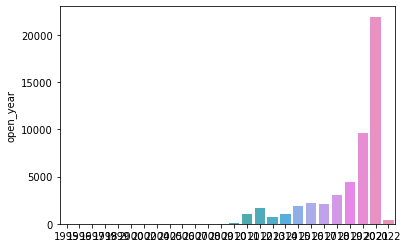

In [26]:
ax = sns.barplot(x=indx_yr, y=yr_count)
ax.bar_label(ax.containers[0])
plt.xticks(rotation='vertical')
plt.show()

In [23]:
#Seeing connector types throughout different areas
#stations.CHADEMO.value_counts()
#stations.J1772.value_counts()
#stations.J1772COMBO.value_counts()
#stations.NEMA1450.value_counts()
#stations.NEMA515.value_counts()
#stations.NEMA520.value_counts()
#stations.TESLA.value_counts()

conn_count = stations[['CHADEMO','J1772','J1772COMBO','NEMA1450','NEMA515','NEMA520','TESLA']].value_counts()
conn_count 

#plt.figure()
#plt.bar()
#plt.title()
#plt.show()

CHADEMO  J1772  J1772COMBO  NEMA1450  NEMA515  NEMA520  TESLA
0        1      0           0         0        0        0        38747
         0      0           0         0        0        1         3326
1        0      1           0         0        0        0         2975
0        1      0           0         0        0        1         2527
1        1      1           0         0        0        0          640
                0           0         0        0        0          407
0        0      1           0         0        0        0          390
                0           0         0        1        0          242
                                      1        0        0          218
         1      0           0         1        0        0          213
1        0      0           0         0        0        0          138
0        0      0           1         0        0        0          116
         1      0           0         0        1        0          100
               